In [1]:
from DBNets import DBNets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from DBNets import oofargo
from DBNets import preproc as pp
from scipy.ndimage import gaussian_filter

2024-03-29 20:10:26.342837: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-29 20:10:26.536268: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-29 20:10:26.537223: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-29 20:10:27.374855: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/aleruzza/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.

## Loading DBNets

In [2]:
dbnets = DBNets.DBNets(ensemble='finalRI')

Initializing DBNets


Loading the CNN ensemble: 100%|█████████████████| 50/50 [00:36<00:00,  1.37it/s]


## Loading GWLup image and smoothing it to the same resolution of training dataset

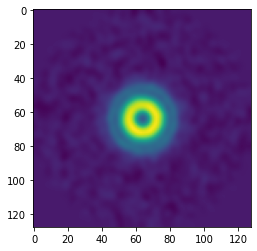

In [3]:
gwlup = np.load('../../../ppdisk_image_catalogue/npy_images/gwlup.npy')
paradiscs = pd.read_csv('../../../ppdisk_image_catalogue/data.csv')
gwlup = gaussian_filter(gwlup, 16*np.sqrt(0.125**2-0.04**2))
gwlup = (gwlup-gwlup.mean())/gwlup.std()
plt.imshow(gwlup)

In [4]:
paradiscs[paradiscs['Disk name']=='GW Lup']

,Disk name,log_age_min,log_age_max,class,gap id,fitsname,npyfilename,cx,cy,Semi Major axis [au],...,lodato_pred,kin,kin_ref,ALMA Band,Img Reference,Data reference,Mp_simu [Mj],sim references,Notes,Unnamed: 35
4,GW Lup,5.9,6.7,II,1.0,GWLup_continuum.fits,gwlup.npy,1501,1501,74.0,...,0.035,NaN,NaN,6,dsharp,Zhang2018,NaN,NaN,NaN,NaN


In [5]:
plain_res = dbnets.measure(gwlup)

Text(0, 0.5, 'pdf')

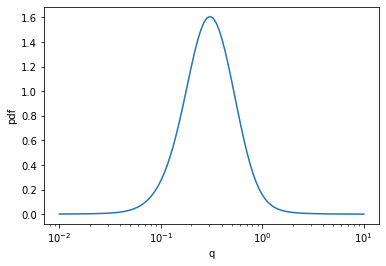

In [6]:
plain_res.summary_measure()
x = np.linspace(-2,1,100)
plt.plot(10**x, plain_res.pdf(x))
plt.xscale('log')
plt.xlabel('q')
plt.ylabel('pdf')

## Loading data for retraining

In [7]:
para = pd.read_csv('./params(1).csv')

In [8]:
data1500 = np.load('Simulazioni_1500.npy', allow_pickle=True).item()

In [16]:
data = np.array([(data1500[i]-data1500[i].mean())/(data1500[i].std()) for i in range(0,300)]).reshape(-1,128,128,1)

In [17]:
data = gaussian_filter(data,[ 0, 0.04*16, 0.04*16, 0])

In [12]:
gaussian_filter?

In [23]:
train_x = data[:200]
test_x = data[200:]
train_y = np.array(np.log10(para.loc[0:199, 'PlanetMass']))+3
test_y = np.array(np.log10(para.loc[200:300, 'PlanetMass']))+3

In [24]:
dbnets.finetune?

In [25]:
dbnets.finetune(train_x, train_y, test_x, test_y, 'realdata4')

starting fine tuning


0it [00:00, ?it/s]

Epoch 1/20
84/84 [==============================] - 16s 180ms/step - loss: -1.1159 - val_loss: -1.3728
Epoch 2/20
84/84 [==============================] - 15s 180ms/step - loss: -1.1298 - val_loss: -1.3866
Epoch 3/20
84/84 [==============================] - 14s 171ms/step - loss: -1.1406 - val_loss: -1.3971
Epoch 4/20
84/84 [==============================] - 13s 159ms/step - loss: -1.1530 - val_loss: -1.4132
Epoch 5/20
84/84 [==============================] - 13s 158ms/step - loss: -1.1601 - val_loss: -1.4184
Epoch 6/20
84/84 [==============================] - 13s 156ms/step - loss: -1.1743 - val_loss: -1.4196
Epoch 7/20
84/84 [==============================] - 13s 157ms/step - loss: -1.1548 - val_loss: -1.4223
Epoch 8/20
84/84 [==============================] - 13s 158ms/step - loss: -1.1687 - val_loss: -1.4338
Epoch 9/20
84/84 [==============================] - 14s 166ms/step - loss: -1.1703 - val_loss: -1.4488
Epoch 10/20
84/84 [==============================] - 15s 175ms/step - los

INFO:tensorflow:Assets written to: /home/aleruzza/.local/lib/python3.10/site-packages/DBNets/training/../trained/realdata4/0.1/assets
1it [05:30, 330.53s/it]

Epoch 1/20
84/84 [==============================] - 16s 175ms/step - loss: -0.8674 - val_loss: -1.2276
Epoch 2/20
84/84 [==============================] - 14s 172ms/step - loss: -0.9273 - val_loss: -1.2947
Epoch 3/20
84/84 [==============================] - 14s 171ms/step - loss: -0.9405 - val_loss: -1.3108
Epoch 4/20
84/84 [==============================] - 14s 173ms/step - loss: -0.9559 - val_loss: -1.3074
Epoch 5/20
84/84 [==============================] - 14s 170ms/step - loss: -0.9692 - val_loss: -1.3044
Epoch 6/20
84/84 [==============================] - 14s 170ms/step - loss: -0.9719 - val_loss: -1.3663
Epoch 7/20
84/84 [==============================] - 14s 172ms/step - loss: -0.9808 - val_loss: -1.3782
Epoch 8/20
84/84 [==============================] - 14s 171ms/step - loss: -0.9794 - val_loss: -1.3701
Epoch 9/20
84/84 [==============================] - 14s 170ms/step - loss: -0.9848 - val_loss: -1.3914
Epoch 10/20
84/84 [==============================] - 14s 171ms/step - los

INFO:tensorflow:Assets written to: /home/aleruzza/.local/lib/python3.10/site-packages/DBNets/training/../trained/realdata4/0.2/assets
2it [10:48, 322.97s/it]

Epoch 1/20
84/84 [==============================] - 15s 173ms/step - loss: -1.1544 - val_loss: -1.2787
Epoch 2/20
84/84 [==============================] - 14s 169ms/step - loss: -1.1945 - val_loss: -1.3279
Epoch 3/20
84/84 [==============================] - 14s 169ms/step - loss: -1.1973 - val_loss: -1.3175
Epoch 4/20
84/84 [==============================] - 14s 168ms/step - loss: -1.2038 - val_loss: -1.3221
Epoch 5/20
84/84 [==============================] - 14s 172ms/step - loss: -1.2179 - val_loss: -1.3164
Epoch 6/20
84/84 [==============================] - 14s 171ms/step - loss: -1.2213 - val_loss: -1.2995
Epoch 7/20
84/84 [==============================] - 14s 171ms/step - loss: -1.2252 - val_loss: -1.3162
Epoch 8/20
84/84 [==============================] - 14s 171ms/step - loss: -1.2288 - val_loss: -1.3105
Epoch 9/20
84/84 [==============================] - 14s 171ms/step - loss: -1.2279 - val_loss: -1.3152
Epoch 10/20
84/84 [==============================] - 15s 174ms/step - los

INFO:tensorflow:Assets written to: /home/aleruzza/.local/lib/python3.10/site-packages/DBNets/training/../trained/realdata4/0.3/assets
3it [16:07, 321.21s/it]

Epoch 1/20
84/84 [==============================] - 16s 177ms/step - loss: -0.9143 - val_loss: -1.2481
Epoch 2/20
84/84 [==============================] - 15s 174ms/step - loss: -0.9563 - val_loss: -1.2627
Epoch 3/20
84/84 [==============================] - 14s 173ms/step - loss: -0.9767 - val_loss: -1.2897
Epoch 4/20
84/84 [==============================] - 15s 177ms/step - loss: -0.9994 - val_loss: -1.3239
Epoch 5/20
84/84 [==============================] - 15s 174ms/step - loss: -0.9803 - val_loss: -1.2701
Epoch 6/20
84/84 [==============================] - 15s 173ms/step - loss: -1.0023 - val_loss: -1.3185
Epoch 7/20
84/84 [==============================] - 15s 178ms/step - loss: -1.0037 - val_loss: -1.2853
Epoch 8/20
84/84 [==============================] - 14s 171ms/step - loss: -0.5227 - val_loss: -1.3401
Epoch 9/20
84/84 [==============================] - 14s 169ms/step - loss: -1.0121 - val_loss: -1.3416
Epoch 10/20
84/84 [==============================] - 14s 170ms/step - los

INFO:tensorflow:Assets written to: /home/aleruzza/.local/lib/python3.10/site-packages/DBNets/training/../trained/realdata4/0.4/assets
4it [21:30, 322.12s/it]

Epoch 1/20
84/84 [==============================] - 16s 173ms/step - loss: -1.3450 - val_loss: -1.3519
Epoch 2/20
84/84 [==============================] - 14s 167ms/step - loss: -1.3711 - val_loss: -1.3914
Epoch 3/20
84/84 [==============================] - 14s 170ms/step - loss: -1.3881 - val_loss: -1.4256
Epoch 4/20
84/84 [==============================] - 14s 168ms/step - loss: -1.3994 - val_loss: -1.4204
Epoch 5/20
84/84 [==============================] - 14s 167ms/step - loss: -1.4090 - val_loss: -1.3794
Epoch 6/20
84/84 [==============================] - 14s 167ms/step - loss: -1.4108 - val_loss: -1.4496
Epoch 7/20
84/84 [==============================] - 14s 165ms/step - loss: -1.3926 - val_loss: -1.4231
Epoch 8/20
84/84 [==============================] - 14s 165ms/step - loss: -1.3981 - val_loss: -1.4689
Epoch 9/20
84/84 [==============================] - 14s 164ms/step - loss: -1.4150 - val_loss: -1.4167
Epoch 10/20
84/84 [==============================] - 14s 166ms/step - los

INFO:tensorflow:Assets written to: /home/aleruzza/.local/lib/python3.10/site-packages/DBNets/training/../trained/realdata4/0.5/assets
5it [26:51, 321.71s/it]

Epoch 1/20
84/84 [==============================] - 16s 175ms/step - loss: -1.3515 - val_loss: -1.3592
Epoch 2/20
84/84 [==============================] - 14s 170ms/step - loss: -1.3770 - val_loss: -1.4196
Epoch 3/20
84/84 [==============================] - 14s 166ms/step - loss: -1.3910 - val_loss: -1.3654
Epoch 4/20
84/84 [==============================] - 14s 168ms/step - loss: -1.3996 - val_loss: -1.3852
Epoch 5/20
84/84 [==============================] - 14s 167ms/step - loss: -1.4005 - val_loss: -1.4060
Epoch 6/20
84/84 [==============================] - 14s 168ms/step - loss: -1.4071 - val_loss: -1.3982
Epoch 7/20
84/84 [==============================] - 14s 166ms/step - loss: -1.4191 - val_loss: -1.3925
Epoch 8/20
84/84 [==============================] - 14s 166ms/step - loss: -1.4224 - val_loss: -1.4048
Epoch 9/20
84/84 [==============================] - 14s 167ms/step - loss: -1.4271 - val_loss: -1.4017
Epoch 10/20
84/84 [==============================] - 14s 166ms/step - los

INFO:tensorflow:Assets written to: /home/aleruzza/.local/lib/python3.10/site-packages/DBNets/training/../trained/realdata4/1.1/assets
6it [32:13, 321.79s/it]

Epoch 1/20
84/84 [==============================] - 16s 173ms/step - loss: -1.3479 - val_loss: -1.4300
Epoch 2/20
84/84 [==============================] - 14s 167ms/step - loss: -1.3814 - val_loss: -1.4409
Epoch 3/20
84/84 [==============================] - 14s 166ms/step - loss: -1.3798 - val_loss: -1.4651
Epoch 4/20
84/84 [==============================] - 14s 166ms/step - loss: -1.4025 - val_loss: -1.4325
Epoch 5/20
84/84 [==============================] - 14s 168ms/step - loss: -1.3997 - val_loss: -1.4701
Epoch 6/20
84/84 [==============================] - 14s 164ms/step - loss: -1.4080 - val_loss: -1.4636
Epoch 7/20
84/84 [==============================] - 14s 165ms/step - loss: -1.4061 - val_loss: -1.4941
Epoch 8/20
84/84 [==============================] - 14s 165ms/step - loss: -1.4185 - val_loss: -1.4804
Epoch 9/20
84/84 [==============================] - 14s 166ms/step - loss: -1.4244 - val_loss: -1.4578
Epoch 10/20
84/84 [==============================] - 14s 169ms/step - los

INFO:tensorflow:Assets written to: /home/aleruzza/.local/lib/python3.10/site-packages/DBNets/training/../trained/realdata4/1.2/assets
7it [37:35, 321.77s/it]

Epoch 1/20
84/84 [==============================] - 16s 176ms/step - loss: -1.2011 - val_loss: -1.3948
Epoch 2/20
84/84 [==============================] - 14s 168ms/step - loss: -1.2203 - val_loss: -1.4067
Epoch 3/20
84/84 [==============================] - 14s 168ms/step - loss: -1.2443 - val_loss: -1.3814
Epoch 4/20
84/84 [==============================] - 14s 169ms/step - loss: -1.2471 - val_loss: -1.4094
Epoch 5/20
84/84 [==============================] - 14s 168ms/step - loss: -1.2526 - val_loss: -1.4150
Epoch 6/20
84/84 [==============================] - 14s 168ms/step - loss: -1.2563 - val_loss: -1.4178
Epoch 7/20
84/84 [==============================] - 14s 169ms/step - loss: -1.2604 - val_loss: -1.4254
Epoch 8/20
84/84 [==============================] - 14s 169ms/step - loss: -1.2645 - val_loss: -1.4188
Epoch 9/20
84/84 [==============================] - 14s 170ms/step - loss: -1.2725 - val_loss: -1.4287
Epoch 10/20
84/84 [==============================] - 14s 168ms/step - los

INFO:tensorflow:Assets written to: /home/aleruzza/.local/lib/python3.10/site-packages/DBNets/training/../trained/realdata4/1.3/assets
8it [43:03, 323.77s/it]

Epoch 1/20
84/84 [==============================] - 16s 176ms/step - loss: -1.1964 - val_loss: -1.2788
Epoch 2/20
84/84 [==============================] - 14s 169ms/step - loss: -1.2280 - val_loss: -1.3316
Epoch 3/20
84/84 [==============================] - 14s 171ms/step - loss: -1.2164 - val_loss: -1.3511
Epoch 4/20
84/84 [==============================] - 14s 170ms/step - loss: -1.2389 - val_loss: -1.3599
Epoch 5/20
84/84 [==============================] - 14s 169ms/step - loss: -1.2330 - val_loss: -1.3814
Epoch 6/20
84/84 [==============================] - 14s 169ms/step - loss: -1.2502 - val_loss: -1.3855
Epoch 7/20
84/84 [==============================] - 14s 170ms/step - loss: -1.2520 - val_loss: -1.3982
Epoch 8/20
84/84 [==============================] - 14s 170ms/step - loss: -1.2493 - val_loss: -1.4110
Epoch 9/20
84/84 [==============================] - 14s 168ms/step - loss: -1.2579 - val_loss: -1.4034
Epoch 10/20
84/84 [==============================] - 14s 170ms/step - los

INFO:tensorflow:Assets written to: /home/aleruzza/.local/lib/python3.10/site-packages/DBNets/training/../trained/realdata4/1.4/assets
9it [48:32, 325.38s/it]

Epoch 1/20
84/84 [==============================] - 16s 178ms/step - loss: -1.3411 - val_loss: -1.3143
Epoch 2/20
84/84 [==============================] - 14s 168ms/step - loss: -1.3741 - val_loss: -1.4055
Epoch 3/20
84/84 [==============================] - 14s 168ms/step - loss: -1.3948 - val_loss: -1.4002
Epoch 4/20
84/84 [==============================] - 14s 167ms/step - loss: -1.3953 - val_loss: -1.3859
Epoch 5/20
84/84 [==============================] - 14s 172ms/step - loss: -1.3991 - val_loss: -1.4104
Epoch 6/20
84/84 [==============================] - 14s 169ms/step - loss: -1.4007 - val_loss: -1.4004
Epoch 7/20
84/84 [==============================] - 14s 168ms/step - loss: -1.3957 - val_loss: -1.4219
Epoch 8/20
84/84 [==============================] - 14s 168ms/step - loss: -1.3982 - val_loss: -1.4419
Epoch 9/20
84/84 [==============================] - 14s 168ms/step - loss: -1.4211 - val_loss: -1.3991
Epoch 10/20
84/84 [==============================] - 14s 170ms/step - los

INFO:tensorflow:Assets written to: /home/aleruzza/.local/lib/python3.10/site-packages/DBNets/training/../trained/realdata4/1.5/assets
10it [53:58, 325.63s/it]

Epoch 1/20
84/84 [==============================] - 16s 176ms/step - loss: -1.1933 - val_loss: -1.4532
Epoch 2/20
84/84 [==============================] - 14s 167ms/step - loss: -1.2413 - val_loss: -1.4693
Epoch 3/20
84/84 [==============================] - 14s 169ms/step - loss: -1.2485 - val_loss: -1.4804
Epoch 4/20
84/84 [==============================] - 14s 169ms/step - loss: -1.2494 - val_loss: -1.4754
Epoch 5/20
84/84 [==============================] - 14s 169ms/step - loss: -1.2548 - val_loss: -1.4670
Epoch 6/20
84/84 [==============================] - 14s 170ms/step - loss: -1.2550 - val_loss: -1.4808
Epoch 7/20
84/84 [==============================] - 14s 168ms/step - loss: -1.2652 - val_loss: -1.4555
Epoch 8/20
84/84 [==============================] - 14s 166ms/step - loss: -1.2696 - val_loss: -1.4856
Epoch 9/20
84/84 [==============================] - 14s 168ms/step - loss: -1.2724 - val_loss: -1.4816
Epoch 10/20
84/84 [==============================] - 14s 169ms/step - los

INFO:tensorflow:Assets written to: /home/aleruzza/.local/lib/python3.10/site-packages/DBNets/training/../trained/realdata4/2.1/assets
11it [59:25, 325.94s/it]

Epoch 1/20
84/84 [==============================] - 16s 179ms/step - loss: -1.2254 - val_loss: -1.3002
Epoch 2/20
84/84 [==============================] - 14s 168ms/step - loss: -1.2588 - val_loss: -1.3407
Epoch 3/20
84/84 [==============================] - 14s 166ms/step - loss: -1.2724 - val_loss: -1.3405
Epoch 4/20
84/84 [==============================] - 14s 166ms/step - loss: -1.2782 - val_loss: -1.3573
Epoch 5/20
84/84 [==============================] - 14s 168ms/step - loss: -1.2806 - val_loss: -1.3592
Epoch 6/20
84/84 [==============================] - 14s 167ms/step - loss: -1.2783 - val_loss: -1.3677
Epoch 7/20
84/84 [==============================] - 14s 168ms/step - loss: -1.2921 - val_loss: -1.3730
Epoch 8/20
84/84 [==============================] - 14s 168ms/step - loss: -1.2925 - val_loss: -1.3880
Epoch 9/20
84/84 [==============================] - 14s 168ms/step - loss: -1.2922 - val_loss: -1.3856
Epoch 10/20
84/84 [==============================] - 14s 165ms/step - los

INFO:tensorflow:Assets written to: /home/aleruzza/.local/lib/python3.10/site-packages/DBNets/training/../trained/realdata4/2.2/assets
12it [1:04:51, 326.11s/it]

Epoch 1/20
84/84 [==============================] - 16s 173ms/step - loss: -1.2470 - val_loss: -1.3724
Epoch 2/20
84/84 [==============================] - 14s 165ms/step - loss: -1.2727 - val_loss: -1.3780
Epoch 3/20
84/84 [==============================] - 14s 167ms/step - loss: -1.2988 - val_loss: -1.3463
Epoch 4/20
84/84 [==============================] - 14s 170ms/step - loss: -1.2939 - val_loss: -1.3500
Epoch 5/20
84/84 [==============================] - 14s 165ms/step - loss: -1.3041 - val_loss: -1.3652
Epoch 6/20
84/84 [==============================] - 14s 166ms/step - loss: -1.3088 - val_loss: -1.3866
Epoch 7/20
84/84 [==============================] - 15s 176ms/step - loss: -1.3059 - val_loss: -1.3739
Epoch 8/20
84/84 [==============================] - 14s 167ms/step - loss: -1.3150 - val_loss: -1.3655
Epoch 9/20
84/84 [==============================] - 14s 164ms/step - loss: -1.3118 - val_loss: -1.3943
Epoch 10/20
84/84 [==============================] - 14s 166ms/step - los

INFO:tensorflow:Assets written to: /home/aleruzza/.local/lib/python3.10/site-packages/DBNets/training/../trained/realdata4/2.3/assets
13it [1:10:18, 326.17s/it]

Epoch 1/20
84/84 [==============================] - 16s 173ms/step - loss: -1.2172 - val_loss: -1.4257
Epoch 2/20
84/84 [==============================] - 14s 164ms/step - loss: -1.2454 - val_loss: -1.3459
Epoch 3/20
84/84 [==============================] - 14s 172ms/step - loss: -1.2632 - val_loss: -1.4207
Epoch 4/20
84/84 [==============================] - 14s 165ms/step - loss: -1.2591 - val_loss: -1.4266
Epoch 5/20
84/84 [==============================] - 14s 167ms/step - loss: -1.2713 - val_loss: -1.4166
Epoch 6/20
84/84 [==============================] - 14s 166ms/step - loss: -1.2712 - val_loss: -1.4367
Epoch 7/20
84/84 [==============================] - 14s 166ms/step - loss: -1.2669 - val_loss: -1.4438
Epoch 8/20
84/84 [==============================] - 14s 169ms/step - loss: -1.2702 - val_loss: -1.4449
Epoch 9/20
84/84 [==============================] - 14s 164ms/step - loss: -1.2804 - val_loss: -1.4215
Epoch 10/20
84/84 [==============================] - 14s 164ms/step - los

INFO:tensorflow:Assets written to: /home/aleruzza/.local/lib/python3.10/site-packages/DBNets/training/../trained/realdata4/2.4/assets
14it [1:15:44, 326.15s/it]

Epoch 1/20
84/84 [==============================] - 16s 176ms/step - loss: -1.2321 - val_loss: -1.3117
Epoch 2/20
84/84 [==============================] - 14s 167ms/step - loss: -1.2798 - val_loss: -1.3487
Epoch 3/20
84/84 [==============================] - 15s 175ms/step - loss: -1.2882 - val_loss: -1.3429
Epoch 4/20
84/84 [==============================] - 14s 167ms/step - loss: -1.2944 - val_loss: -1.3487
Epoch 5/20
84/84 [==============================] - 15s 176ms/step - loss: -1.2891 - val_loss: -1.3451
Epoch 6/20
84/84 [==============================] - 15s 175ms/step - loss: -1.3020 - val_loss: -1.3338
Epoch 7/20
84/84 [==============================] - 14s 167ms/step - loss: -1.2932 - val_loss: -1.3592
Epoch 8/20
84/84 [==============================] - 14s 167ms/step - loss: -1.3057 - val_loss: -1.3603
Epoch 9/20
84/84 [==============================] - 14s 167ms/step - loss: -1.3031 - val_loss: -1.3466
Epoch 10/20
84/84 [==============================] - 14s 167ms/step - los

INFO:tensorflow:Assets written to: /home/aleruzza/.local/lib/python3.10/site-packages/DBNets/training/../trained/realdata4/2.5/assets
15it [1:21:16, 327.91s/it]

Epoch 1/20
84/84 [==============================] - 17s 176ms/step - loss: -1.3014 - val_loss: -1.4053
Epoch 2/20
84/84 [==============================] - 14s 168ms/step - loss: -1.3402 - val_loss: -1.3902
Epoch 3/20
84/84 [==============================] - 14s 169ms/step - loss: -1.3447 - val_loss: -1.3845
Epoch 4/20
84/84 [==============================] - 16s 187ms/step - loss: -1.3499 - val_loss: -1.4069
Epoch 5/20
84/84 [==============================] - 14s 172ms/step - loss: -1.3675 - val_loss: -1.3834
Epoch 6/20
84/84 [==============================] - 14s 168ms/step - loss: -1.3595 - val_loss: -1.4090
Epoch 7/20
84/84 [==============================] - 14s 168ms/step - loss: -1.3726 - val_loss: -1.4106
Epoch 8/20
84/84 [==============================] - 14s 168ms/step - loss: -1.3740 - val_loss: -1.4296
Epoch 9/20
84/84 [==============================] - 14s 168ms/step - loss: -1.3822 - val_loss: -1.4318
Epoch 10/20
84/84 [==============================] - 14s 168ms/step - los

INFO:tensorflow:Assets written to: /home/aleruzza/.local/lib/python3.10/site-packages/DBNets/training/../trained/realdata4/3.1/assets
16it [1:26:46, 328.55s/it]

Epoch 1/20
84/84 [==============================] - 17s 178ms/step - loss: -1.2051 - val_loss: -1.2959
Epoch 2/20
84/84 [==============================] - 14s 165ms/step - loss: -1.2357 - val_loss: -1.3066
Epoch 3/20
84/84 [==============================] - 14s 165ms/step - loss: -1.2411 - val_loss: -1.3626
Epoch 4/20
84/84 [==============================] - 14s 164ms/step - loss: -1.2518 - val_loss: -1.3584
Epoch 5/20
84/84 [==============================] - 14s 163ms/step - loss: -1.2583 - val_loss: -1.3559
Epoch 6/20
84/84 [==============================] - 14s 164ms/step - loss: -1.2649 - val_loss: -1.3498
Epoch 7/20
84/84 [==============================] - 14s 167ms/step - loss: -1.2683 - val_loss: -1.3556
Epoch 8/20
84/84 [==============================] - 14s 172ms/step - loss: -1.2668 - val_loss: -1.3361
Epoch 9/20
84/84 [==============================] - 14s 167ms/step - loss: -1.2717 - val_loss: -1.3505
Epoch 10/20
84/84 [==============================] - 14s 165ms/step - los

INFO:tensorflow:Assets written to: /home/aleruzza/.local/lib/python3.10/site-packages/DBNets/training/../trained/realdata4/3.2/assets
17it [1:32:14, 328.60s/it]

Epoch 1/20
84/84 [==============================] - 16s 174ms/step - loss: -1.3818 - val_loss: -1.2762
Epoch 2/20
84/84 [==============================] - 14s 165ms/step - loss: -1.4273 - val_loss: -1.3251
Epoch 3/20
84/84 [==============================] - 14s 163ms/step - loss: -1.4348 - val_loss: -1.2728
Epoch 4/20
84/84 [==============================] - 14s 168ms/step - loss: -1.4339 - val_loss: -1.3896
Epoch 5/20
84/84 [==============================] - 14s 167ms/step - loss: -1.4465 - val_loss: -1.3412
Epoch 6/20
84/84 [==============================] - 14s 167ms/step - loss: -1.4411 - val_loss: -1.3752
Epoch 7/20
84/84 [==============================] - 14s 166ms/step - loss: -1.4541 - val_loss: -1.3435
Epoch 8/20
84/84 [==============================] - 14s 165ms/step - loss: -1.4437 - val_loss: -1.3821
Epoch 9/20
84/84 [==============================] - 14s 166ms/step - loss: -1.4539 - val_loss: -1.3812
Epoch 10/20
84/84 [==============================] - 14s 165ms/step - los

INFO:tensorflow:Assets written to: /home/aleruzza/.local/lib/python3.10/site-packages/DBNets/training/../trained/realdata4/3.3/assets
18it [1:37:46, 329.59s/it]

Epoch 1/20
84/84 [==============================] - 17s 179ms/step - loss: -0.9557 - val_loss: -1.2754
Epoch 2/20
84/84 [==============================] - 14s 167ms/step - loss: -0.9914 - val_loss: -1.3236
Epoch 3/20
84/84 [==============================] - 14s 164ms/step - loss: -1.0057 - val_loss: -1.3423
Epoch 4/20
84/84 [==============================] - 14s 168ms/step - loss: -1.0251 - val_loss: -1.3444
Epoch 5/20
84/84 [==============================] - 15s 178ms/step - loss: -1.0259 - val_loss: -1.3325
Epoch 6/20
84/84 [==============================] - 14s 166ms/step - loss: -1.0353 - val_loss: -1.3412
Epoch 7/20
84/84 [==============================] - 14s 166ms/step - loss: -1.0361 - val_loss: -1.3528
Epoch 8/20
84/84 [==============================] - 14s 165ms/step - loss: -1.0532 - val_loss: -1.3811
Epoch 9/20
84/84 [==============================] - 14s 165ms/step - loss: -1.0497 - val_loss: -1.3345
Epoch 10/20
84/84 [==============================] - 14s 164ms/step - los

INFO:tensorflow:Assets written to: /home/aleruzza/.local/lib/python3.10/site-packages/DBNets/training/../trained/realdata4/3.4/assets
19it [1:43:23, 331.82s/it]

Epoch 1/20
84/84 [==============================] - 17s 179ms/step - loss: -1.3345 - val_loss: -1.4564
Epoch 2/20
84/84 [==============================] - 14s 171ms/step - loss: -1.3802 - val_loss: -1.4796
Epoch 3/20
84/84 [==============================] - 14s 171ms/step - loss: -1.3850 - val_loss: -1.4989
Epoch 4/20
84/84 [==============================] - 14s 170ms/step - loss: -1.3929 - val_loss: -1.4984
Epoch 5/20
84/84 [==============================] - 14s 172ms/step - loss: -1.4046 - val_loss: -1.5060
Epoch 6/20
84/84 [==============================] - 14s 172ms/step - loss: -1.4193 - val_loss: -1.5126
Epoch 7/20
84/84 [==============================] - 14s 171ms/step - loss: -1.4186 - val_loss: -1.5205
Epoch 8/20
84/84 [==============================] - 14s 168ms/step - loss: -1.4141 - val_loss: -1.5369
Epoch 9/20
84/84 [==============================] - 14s 170ms/step - loss: -1.4113 - val_loss: -1.5481
Epoch 10/20
84/84 [==============================] - 14s 172ms/step - los

INFO:tensorflow:Assets written to: /home/aleruzza/.local/lib/python3.10/site-packages/DBNets/training/../trained/realdata4/3.5/assets
20it [1:49:05, 334.89s/it]

Epoch 1/20
84/84 [==============================] - 17s 183ms/step - loss: -1.2459 - val_loss: -1.3506
Epoch 2/20
84/84 [==============================] - 14s 172ms/step - loss: -1.2703 - val_loss: -1.3919
Epoch 3/20
84/84 [==============================] - 15s 173ms/step - loss: -1.2834 - val_loss: -1.4185
Epoch 4/20
84/84 [==============================] - 15s 174ms/step - loss: -1.2880 - val_loss: -1.4248
Epoch 5/20
84/84 [==============================] - 14s 172ms/step - loss: -1.2813 - val_loss: -1.3700
Epoch 6/20
84/84 [==============================] - 14s 170ms/step - loss: -1.2918 - val_loss: -1.4078
Epoch 7/20
84/84 [==============================] - 15s 174ms/step - loss: -1.2873 - val_loss: -1.4313
Epoch 8/20
84/84 [==============================] - 15s 174ms/step - loss: -1.2938 - val_loss: -1.3972
Epoch 9/20
84/84 [==============================] - 15s 173ms/step - loss: -1.3035 - val_loss: -1.4182
Epoch 10/20
84/84 [==============================] - 14s 172ms/step - los

INFO:tensorflow:Assets written to: /home/aleruzza/.local/lib/python3.10/site-packages/DBNets/training/../trained/realdata4/4.1/assets
21it [1:54:48, 337.15s/it]

Epoch 1/20
84/84 [==============================] - 20s 192ms/step - loss: -0.9167 - val_loss: -1.1309
Epoch 2/20
84/84 [==============================] - 15s 173ms/step - loss: -0.9818 - val_loss: -1.1718
Epoch 3/20
84/84 [==============================] - 15s 174ms/step - loss: -0.9926 - val_loss: -1.1192
Epoch 4/20
84/84 [==============================] - 15s 173ms/step - loss: -1.0060 - val_loss: -1.1739
Epoch 5/20
84/84 [==============================] - 14s 172ms/step - loss: -1.0144 - val_loss: -1.1829
Epoch 6/20
84/84 [==============================] - 14s 171ms/step - loss: -1.0080 - val_loss: -1.1714
Epoch 7/20
84/84 [==============================] - 14s 169ms/step - loss: -1.0273 - val_loss: -1.1793
Epoch 8/20
84/84 [==============================] - 14s 172ms/step - loss: -1.0282 - val_loss: -1.1874
Epoch 9/20
84/84 [==============================] - 14s 170ms/step - loss: -1.0283 - val_loss: -1.1967
Epoch 10/20
84/84 [==============================] - 14s 169ms/step - los

INFO:tensorflow:Assets written to: /home/aleruzza/.local/lib/python3.10/site-packages/DBNets/training/../trained/realdata4/4.2/assets
22it [2:00:32, 339.40s/it]

Epoch 1/20
84/84 [==============================] - 17s 179ms/step - loss: -1.2137 - val_loss: -1.3940
Epoch 2/20
84/84 [==============================] - 14s 171ms/step - loss: -1.2423 - val_loss: -1.4069
Epoch 3/20
84/84 [==============================] - 15s 175ms/step - loss: -1.2673 - val_loss: -1.3749
Epoch 4/20
84/84 [==============================] - 15s 176ms/step - loss: -1.2837 - val_loss: -1.4244
Epoch 5/20
84/84 [==============================] - 15s 173ms/step - loss: -1.2870 - val_loss: -1.3798
Epoch 6/20
84/84 [==============================] - 15s 174ms/step - loss: -1.2689 - val_loss: -1.4259
Epoch 7/20
84/84 [==============================] - 14s 172ms/step - loss: -1.2894 - val_loss: -1.4031
Epoch 8/20
84/84 [==============================] - 14s 171ms/step - loss: -1.2934 - val_loss: -1.3978
Epoch 9/20
84/84 [==============================] - 14s 170ms/step - loss: -1.2782 - val_loss: -1.4107
Epoch 10/20
84/84 [==============================] - 14s 172ms/step - los

INFO:tensorflow:Assets written to: /home/aleruzza/.local/lib/python3.10/site-packages/DBNets/training/../trained/realdata4/4.3/assets
23it [2:06:14, 340.15s/it]

Epoch 1/20
84/84 [==============================] - 18s 187ms/step - loss: -1.0212 - val_loss: -1.3479
Epoch 2/20
84/84 [==============================] - 14s 171ms/step - loss: -1.0741 - val_loss: -1.3415
Epoch 3/20
84/84 [==============================] - 15s 173ms/step - loss: -1.0829 - val_loss: -1.3791
Epoch 4/20
84/84 [==============================] - 14s 171ms/step - loss: -1.0810 - val_loss: -1.3991
Epoch 5/20
84/84 [==============================] - 14s 170ms/step - loss: -1.0839 - val_loss: -1.3842
Epoch 6/20
84/84 [==============================] - 14s 170ms/step - loss: -1.1053 - val_loss: -1.3825
Epoch 7/20
84/84 [==============================] - 14s 171ms/step - loss: -1.1111 - val_loss: -1.3991
Epoch 8/20
84/84 [==============================] - 14s 172ms/step - loss: -1.1109 - val_loss: -1.4261
Epoch 9/20
84/84 [==============================] - 14s 169ms/step - loss: -1.1174 - val_loss: -1.4202
Epoch 10/20
84/84 [==============================] - 14s 172ms/step - los

INFO:tensorflow:Assets written to: /home/aleruzza/.local/lib/python3.10/site-packages/DBNets/training/../trained/realdata4/4.4/assets
24it [2:11:59, 341.38s/it]

Epoch 1/20
84/84 [==============================] - 18s 182ms/step - loss: -1.2977 - val_loss: -1.3411
Epoch 2/20
84/84 [==============================] - 14s 168ms/step - loss: -1.3307 - val_loss: -1.4461
Epoch 3/20
84/84 [==============================] - 14s 171ms/step - loss: -1.3399 - val_loss: -1.4163
Epoch 4/20
84/84 [==============================] - 14s 171ms/step - loss: -1.3538 - val_loss: -1.4339
Epoch 5/20
84/84 [==============================] - 14s 169ms/step - loss: -1.3581 - val_loss: -1.4689
Epoch 6/20
84/84 [==============================] - 14s 168ms/step - loss: -1.3612 - val_loss: -1.4743
Epoch 7/20
84/84 [==============================] - 15s 175ms/step - loss: -1.3770 - val_loss: -1.4968
Epoch 8/20
84/84 [==============================] - 14s 170ms/step - loss: -1.3729 - val_loss: -1.4866
Epoch 9/20
84/84 [==============================] - 14s 170ms/step - loss: -1.3767 - val_loss: -1.5094
Epoch 10/20
84/84 [==============================] - 14s 168ms/step - los

INFO:tensorflow:Assets written to: /home/aleruzza/.local/lib/python3.10/site-packages/DBNets/training/../trained/realdata4/4.5/assets
25it [2:17:43, 342.15s/it]

Epoch 1/20
84/84 [==============================] - 23s 245ms/step - loss: -1.2272 - val_loss: -1.3866
Epoch 2/20
84/84 [==============================] - 15s 179ms/step - loss: -1.2716 - val_loss: -1.4016
Epoch 3/20
84/84 [==============================] - 15s 177ms/step - loss: -1.2750 - val_loss: -1.3887
Epoch 4/20
84/84 [==============================] - 15s 177ms/step - loss: -1.2867 - val_loss: -1.4004
Epoch 5/20
84/84 [==============================] - 18s 211ms/step - loss: -1.2810 - val_loss: -1.4225
Epoch 6/20
84/84 [==============================] - 15s 184ms/step - loss: -1.2879 - val_loss: -1.3995
Epoch 7/20
84/84 [==============================] - 15s 179ms/step - loss: -1.2983 - val_loss: -1.3905
Epoch 8/20
84/84 [==============================] - 16s 187ms/step - loss: -1.3045 - val_loss: -1.4169
Epoch 9/20
84/84 [==============================] - 15s 177ms/step - loss: -1.3028 - val_loss: -1.4335
Epoch 10/20
84/84 [==============================] - 15s 174ms/step - los

INFO:tensorflow:Assets written to: /home/aleruzza/.local/lib/python3.10/site-packages/DBNets/training/../trained/realdata4/5.1/assets
26it [2:23:41, 347.07s/it]

Epoch 1/20
84/84 [==============================] - 17s 182ms/step - loss: -0.5256 - val_loss: -0.8449
Epoch 2/20
84/84 [==============================] - 17s 200ms/step - loss: -0.6656 - val_loss: -1.0269
Epoch 3/20
84/84 [==============================] - 15s 179ms/step - loss: -0.7669 - val_loss: -1.0473
Epoch 4/20
84/84 [==============================] - 15s 174ms/step - loss: -0.7952 - val_loss: -1.0842
Epoch 5/20
84/84 [==============================] - 14s 173ms/step - loss: -0.7837 - val_loss: -1.1286
Epoch 6/20
84/84 [==============================] - 14s 173ms/step - loss: -0.8292 - val_loss: -1.1260
Epoch 7/20
84/84 [==============================] - 15s 175ms/step - loss: -0.8296 - val_loss: -1.1312
Epoch 8/20
84/84 [==============================] - 15s 179ms/step - loss: -0.8195 - val_loss: -1.1566
Epoch 9/20
84/84 [==============================] - 17s 201ms/step - loss: -0.8528 - val_loss: -1.1701
Epoch 10/20
84/84 [==============================] - 16s 188ms/step - los

INFO:tensorflow:Assets written to: /home/aleruzza/.local/lib/python3.10/site-packages/DBNets/training/../trained/realdata4/5.2/assets
27it [2:29:44, 351.67s/it]

Epoch 1/20
84/84 [==============================] - 17s 185ms/step - loss: -1.0608 - val_loss: -1.2166
Epoch 2/20
84/84 [==============================] - 16s 186ms/step - loss: -1.1025 - val_loss: -1.2144
Epoch 3/20
84/84 [==============================] - 15s 177ms/step - loss: -1.1106 - val_loss: -1.2279
Epoch 4/20
84/84 [==============================] - 15s 175ms/step - loss: -1.1198 - val_loss: -1.2240
Epoch 5/20
84/84 [==============================] - 15s 176ms/step - loss: -1.1305 - val_loss: -1.2554
Epoch 6/20
84/84 [==============================] - 15s 176ms/step - loss: -1.1400 - val_loss: -1.2520
Epoch 7/20
84/84 [==============================] - 15s 175ms/step - loss: -1.1393 - val_loss: -1.2571
Epoch 8/20
84/84 [==============================] - 15s 175ms/step - loss: -1.1489 - val_loss: -1.2518
Epoch 9/20
84/84 [==============================] - 15s 175ms/step - loss: -1.1480 - val_loss: -1.2791
Epoch 10/20
84/84 [==============================] - 15s 174ms/step - los

INFO:tensorflow:Assets written to: /home/aleruzza/.local/lib/python3.10/site-packages/DBNets/training/../trained/realdata4/5.3/assets
28it [2:35:40, 352.99s/it]

Epoch 1/20
84/84 [==============================] - 17s 185ms/step - loss: -1.0397 - val_loss: -1.3282
Epoch 2/20
84/84 [==============================] - 15s 174ms/step - loss: -1.0759 - val_loss: -1.3487
Epoch 3/20
84/84 [==============================] - 15s 178ms/step - loss: -1.0930 - val_loss: -1.3656
Epoch 4/20
84/84 [==============================] - 15s 180ms/step - loss: -1.0926 - val_loss: -1.3253
Epoch 5/20
84/84 [==============================] - 15s 176ms/step - loss: -1.1104 - val_loss: -1.3488
Epoch 6/20
84/84 [==============================] - 15s 174ms/step - loss: -1.1120 - val_loss: -1.3406
Epoch 7/20
84/84 [==============================] - 14s 172ms/step - loss: -1.1159 - val_loss: -1.3909
Epoch 8/20
84/84 [==============================] - 15s 173ms/step - loss: -1.1057 - val_loss: -1.3539
Epoch 9/20
84/84 [==============================] - 14s 172ms/step - loss: -1.1182 - val_loss: -1.3668
Epoch 10/20
84/84 [==============================] - 14s 172ms/step - los

INFO:tensorflow:Assets written to: /home/aleruzza/.local/lib/python3.10/site-packages/DBNets/training/../trained/realdata4/5.4/assets
29it [2:41:26, 350.98s/it]

Epoch 1/20
84/84 [==============================] - 17s 182ms/step - loss: -1.0942 - val_loss: -1.3353
Epoch 2/20
84/84 [==============================] - 15s 177ms/step - loss: -1.1271 - val_loss: -1.3379
Epoch 3/20
84/84 [==============================] - 15s 173ms/step - loss: -1.1385 - val_loss: -1.3819
Epoch 4/20
84/84 [==============================] - 14s 172ms/step - loss: -1.1604 - val_loss: -1.3719
Epoch 5/20
84/84 [==============================] - 14s 172ms/step - loss: -1.1579 - val_loss: -1.3717
Epoch 6/20
84/84 [==============================] - 15s 176ms/step - loss: -1.1606 - val_loss: -1.3925
Epoch 7/20
84/84 [==============================] - 14s 170ms/step - loss: -1.1639 - val_loss: -1.4007
Epoch 8/20
84/84 [==============================] - 14s 170ms/step - loss: -1.1727 - val_loss: -1.3937
Epoch 9/20
84/84 [==============================] - 14s 171ms/step - loss: -1.1751 - val_loss: -1.4009
Epoch 10/20
84/84 [==============================] - 14s 171ms/step - los

INFO:tensorflow:Assets written to: /home/aleruzza/.local/lib/python3.10/site-packages/DBNets/training/../trained/realdata4/5.5/assets
30it [2:47:13, 349.72s/it]

Epoch 1/20
84/84 [==============================] - 17s 182ms/step - loss: -1.3533 - val_loss: -1.3251
Epoch 2/20
84/84 [==============================] - 15s 178ms/step - loss: -1.4041 - val_loss: -1.3301
Epoch 3/20
84/84 [==============================] - 14s 169ms/step - loss: -1.4041 - val_loss: -1.3660
Epoch 4/20
84/84 [==============================] - 14s 170ms/step - loss: -1.4115 - val_loss: -1.3570
Epoch 5/20
84/84 [==============================] - 14s 171ms/step - loss: -1.4157 - val_loss: -1.3816
Epoch 6/20
84/84 [==============================] - 14s 172ms/step - loss: -1.4259 - val_loss: -1.3854
Epoch 7/20
84/84 [==============================] - 15s 174ms/step - loss: -1.4337 - val_loss: -1.3316
Epoch 8/20
84/84 [==============================] - 14s 169ms/step - loss: -1.4333 - val_loss: -1.3791
Epoch 9/20
84/84 [==============================] - 14s 170ms/step - loss: -1.4345 - val_loss: -1.3724
Epoch 10/20
84/84 [==============================] - 14s 170ms/step - los

INFO:tensorflow:Assets written to: /home/aleruzza/.local/lib/python3.10/site-packages/DBNets/training/../trained/realdata4/6.1/assets
31it [2:52:56, 347.93s/it]

Epoch 1/20
84/84 [==============================] - 17s 184ms/step - loss: -1.3056 - val_loss: -1.4343
Epoch 2/20
84/84 [==============================] - 14s 169ms/step - loss: -1.3376 - val_loss: -1.4429
Epoch 3/20
84/84 [==============================] - 14s 171ms/step - loss: -1.3530 - val_loss: -1.4221
Epoch 4/20
84/84 [==============================] - 14s 171ms/step - loss: -1.3525 - val_loss: -1.4658
Epoch 5/20
84/84 [==============================] - 14s 170ms/step - loss: -1.3619 - val_loss: -1.4313
Epoch 6/20
84/84 [==============================] - 14s 171ms/step - loss: -1.3736 - val_loss: -1.4742
Epoch 7/20
84/84 [==============================] - 14s 171ms/step - loss: -1.3616 - val_loss: -1.4958
Epoch 8/20
84/84 [==============================] - 14s 171ms/step - loss: -1.3687 - val_loss: -1.4550
Epoch 9/20
84/84 [==============================] - 14s 168ms/step - loss: -1.3723 - val_loss: -1.4660
Epoch 10/20
84/84 [==============================] - 14s 169ms/step - los

INFO:tensorflow:Assets written to: /home/aleruzza/.local/lib/python3.10/site-packages/DBNets/training/../trained/realdata4/6.2/assets
32it [2:58:41, 346.99s/it]

Epoch 1/20
84/84 [==============================] - 17s 181ms/step - loss: -1.3354 - val_loss: -1.3118
Epoch 2/20
84/84 [==============================] - 14s 167ms/step - loss: -1.3638 - val_loss: -1.3523
Epoch 3/20
84/84 [==============================] - 14s 167ms/step - loss: -1.3936 - val_loss: -1.3205
Epoch 4/20
84/84 [==============================] - 14s 170ms/step - loss: -1.3939 - val_loss: -1.3586
Epoch 5/20
84/84 [==============================] - 14s 170ms/step - loss: -1.3959 - val_loss: -1.3645
Epoch 6/20
84/84 [==============================] - 14s 169ms/step - loss: -1.4004 - val_loss: -1.3780
Epoch 7/20
84/84 [==============================] - 14s 168ms/step - loss: -1.4117 - val_loss: -1.3509
Epoch 8/20
84/84 [==============================] - 14s 168ms/step - loss: -1.4133 - val_loss: -1.3773
Epoch 9/20
84/84 [==============================] - 14s 169ms/step - loss: -1.4136 - val_loss: -1.3544
Epoch 10/20
84/84 [==============================] - 14s 169ms/step - los

INFO:tensorflow:Assets written to: /home/aleruzza/.local/lib/python3.10/site-packages/DBNets/training/../trained/realdata4/6.3/assets
33it [3:04:23, 345.48s/it]

Epoch 1/20
84/84 [==============================] - 17s 183ms/step - loss: -1.2414 - val_loss: -1.4244
Epoch 2/20
84/84 [==============================] - 14s 169ms/step - loss: -1.2798 - val_loss: -1.4982
Epoch 3/20
84/84 [==============================] - 14s 172ms/step - loss: -1.3013 - val_loss: -1.4690
Epoch 4/20
84/84 [==============================] - 14s 170ms/step - loss: -1.2995 - val_loss: -1.4664
Epoch 5/20
84/84 [==============================] - 14s 172ms/step - loss: -1.3074 - val_loss: -1.5120
Epoch 6/20
84/84 [==============================] - 14s 171ms/step - loss: -1.3138 - val_loss: -1.5005
Epoch 7/20
84/84 [==============================] - 14s 172ms/step - loss: -1.3237 - val_loss: -1.5203
Epoch 8/20
84/84 [==============================] - 14s 172ms/step - loss: -1.3180 - val_loss: -1.5068
Epoch 9/20
84/84 [==============================] - 14s 171ms/step - loss: -1.3286 - val_loss: -1.5038
Epoch 10/20
84/84 [==============================] - 14s 172ms/step - los

INFO:tensorflow:Assets written to: /home/aleruzza/.local/lib/python3.10/site-packages/DBNets/training/../trained/realdata4/6.4/assets
34it [3:10:12, 346.49s/it]

Epoch 1/20
84/84 [==============================] - 17s 177ms/step - loss: -1.2797 - val_loss: -1.3767
Epoch 2/20
84/84 [==============================] - 14s 167ms/step - loss: -1.3260 - val_loss: -1.4072
Epoch 3/20
84/84 [==============================] - 14s 169ms/step - loss: -1.3304 - val_loss: -1.4137
Epoch 4/20
84/84 [==============================] - 14s 167ms/step - loss: -1.3298 - val_loss: -1.4202
Epoch 5/20
84/84 [==============================] - 14s 170ms/step - loss: -1.3387 - val_loss: -1.4444
Epoch 6/20
84/84 [==============================] - 14s 170ms/step - loss: -1.3363 - val_loss: -1.4236
Epoch 7/20
84/84 [==============================] - 14s 171ms/step - loss: -1.3496 - val_loss: -1.4382
Epoch 8/20
84/84 [==============================] - 14s 170ms/step - loss: -1.3424 - val_loss: -1.4349
Epoch 9/20
84/84 [==============================] - 14s 172ms/step - loss: -1.3454 - val_loss: -1.4533
Epoch 10/20
84/84 [==============================] - 14s 171ms/step - los

INFO:tensorflow:Assets written to: /home/aleruzza/.local/lib/python3.10/site-packages/DBNets/training/../trained/realdata4/6.5/assets
35it [3:15:54, 345.09s/it]

Epoch 1/20
84/84 [==============================] - 17s 181ms/step - loss: -1.1089 - val_loss: -1.2883
Epoch 2/20
84/84 [==============================] - 16s 186ms/step - loss: -1.1350 - val_loss: -1.2853
Epoch 3/20
84/84 [==============================] - 15s 180ms/step - loss: -1.1412 - val_loss: -1.3316
Epoch 4/20
84/84 [==============================] - 15s 181ms/step - loss: -1.1623 - val_loss: -1.3547
Epoch 5/20
84/84 [==============================] - 14s 173ms/step - loss: -1.1637 - val_loss: -1.3587
Epoch 6/20
84/84 [==============================] - 14s 171ms/step - loss: -1.1826 - val_loss: -1.3715
Epoch 7/20
84/84 [==============================] - 14s 172ms/step - loss: -1.1726 - val_loss: -1.3633
Epoch 8/20
84/84 [==============================] - 14s 170ms/step - loss: -1.1753 - val_loss: -1.3740
Epoch 9/20
84/84 [==============================] - 14s 170ms/step - loss: -1.1780 - val_loss: -1.3718
Epoch 10/20
84/84 [==============================] - 14s 171ms/step - los

INFO:tensorflow:Assets written to: /home/aleruzza/.local/lib/python3.10/site-packages/DBNets/training/../trained/realdata4/7.1/assets
36it [3:21:44, 346.51s/it]

Epoch 1/20
84/84 [==============================] - 17s 182ms/step - loss: -1.1814 - val_loss: -1.2189
Epoch 2/20
84/84 [==============================] - 15s 173ms/step - loss: -1.2176 - val_loss: -1.2140
Epoch 3/20
84/84 [==============================] - 14s 171ms/step - loss: -1.2181 - val_loss: -1.2441
Epoch 4/20
84/84 [==============================] - 14s 166ms/step - loss: -1.2348 - val_loss: -1.2505
Epoch 5/20
84/84 [==============================] - 14s 167ms/step - loss: -1.2414 - val_loss: -1.2642
Epoch 6/20
84/84 [==============================] - 14s 169ms/step - loss: -1.2458 - val_loss: -1.2789
Epoch 7/20
84/84 [==============================] - 14s 171ms/step - loss: -1.2422 - val_loss: -1.2799
Epoch 8/20
84/84 [==============================] - 14s 168ms/step - loss: -1.2478 - val_loss: -1.2651
Epoch 9/20
84/84 [==============================] - 14s 168ms/step - loss: -1.2511 - val_loss: -1.2924
Epoch 10/20
84/84 [==============================] - 14s 169ms/step - los

INFO:tensorflow:Assets written to: /home/aleruzza/.local/lib/python3.10/site-packages/DBNets/training/../trained/realdata4/7.2/assets
37it [3:27:26, 345.35s/it]

Epoch 1/20
84/84 [==============================] - 16s 177ms/step - loss: -0.3576 - val_loss: -0.7830
Epoch 2/20
84/84 [==============================] - 14s 165ms/step - loss: -0.5898 - val_loss: -0.8567
Epoch 3/20
84/84 [==============================] - 14s 170ms/step - loss: -0.6671 - val_loss: -0.9487
Epoch 4/20
84/84 [==============================] - 14s 171ms/step - loss: -0.6670 - val_loss: -0.9798
Epoch 5/20
84/84 [==============================] - 14s 171ms/step - loss: -0.7048 - val_loss: -1.0507
Epoch 6/20
84/84 [==============================] - 14s 167ms/step - loss: -0.7232 - val_loss: -1.0527
Epoch 7/20
84/84 [==============================] - 14s 168ms/step - loss: -0.7479 - val_loss: -1.0157
Epoch 8/20
84/84 [==============================] - 14s 169ms/step - loss: -0.7571 - val_loss: -1.0509
Epoch 9/20
84/84 [==============================] - 14s 171ms/step - loss: -0.7720 - val_loss: -1.0628
Epoch 10/20
84/84 [==============================] - 14s 169ms/step - los

INFO:tensorflow:Assets written to: /home/aleruzza/.local/lib/python3.10/site-packages/DBNets/training/../trained/realdata4/7.3/assets
38it [3:33:14, 346.18s/it]

Epoch 1/20
84/84 [==============================] - 17s 177ms/step - loss: -1.2131 - val_loss: -1.3542
Epoch 2/20
84/84 [==============================] - 14s 170ms/step - loss: -1.2577 - val_loss: -1.3685
Epoch 3/20
84/84 [==============================] - 15s 173ms/step - loss: -1.2618 - val_loss: -1.3919
Epoch 4/20
84/84 [==============================] - 14s 171ms/step - loss: -1.2777 - val_loss: -1.3962
Epoch 5/20
84/84 [==============================] - 14s 171ms/step - loss: -1.2845 - val_loss: -1.4242
Epoch 6/20
84/84 [==============================] - 14s 170ms/step - loss: -1.2795 - val_loss: -1.4277
Epoch 7/20
84/84 [==============================] - 14s 170ms/step - loss: -1.2858 - val_loss: -1.4305
Epoch 8/20
84/84 [==============================] - 14s 171ms/step - loss: -1.2972 - val_loss: -1.4195
Epoch 9/20
84/84 [==============================] - 14s 170ms/step - loss: -1.2923 - val_loss: -1.4277
Epoch 10/20
84/84 [==============================] - 15s 177ms/step - los

INFO:tensorflow:Assets written to: /home/aleruzza/.local/lib/python3.10/site-packages/DBNets/training/../trained/realdata4/7.4/assets
39it [3:39:09, 348.68s/it]

Epoch 1/20
84/84 [==============================] - 19s 200ms/step - loss: -1.3904 - val_loss: -1.4053
Epoch 2/20
84/84 [==============================] - 15s 183ms/step - loss: -1.4273 - val_loss: -1.4516
Epoch 3/20
84/84 [==============================] - 15s 178ms/step - loss: -1.4396 - val_loss: -1.4401
Epoch 4/20
84/84 [==============================] - 15s 178ms/step - loss: -1.4398 - val_loss: -1.4517
Epoch 5/20
84/84 [==============================] - 15s 176ms/step - loss: -1.4471 - val_loss: -1.4227
Epoch 6/20
84/84 [==============================] - 15s 177ms/step - loss: -1.4555 - val_loss: -1.4268
Epoch 7/20
84/84 [==============================] - 15s 177ms/step - loss: -1.4548 - val_loss: -1.3803
Epoch 8/20
84/84 [==============================] - 15s 176ms/step - loss: -1.4539 - val_loss: -1.4527
Epoch 9/20
84/84 [==============================] - 15s 175ms/step - loss: -1.4608 - val_loss: -1.3555
Epoch 10/20
84/84 [==============================] - 15s 174ms/step - los

INFO:tensorflow:Assets written to: /home/aleruzza/.local/lib/python3.10/site-packages/DBNets/training/../trained/realdata4/7.5/assets
40it [3:45:08, 351.78s/it]

Epoch 1/20
84/84 [==============================] - 17s 185ms/step - loss: -1.0974 - val_loss: -1.3250
Epoch 2/20
84/84 [==============================] - 15s 177ms/step - loss: -1.1170 - val_loss: -1.3517
Epoch 3/20
84/84 [==============================] - 15s 177ms/step - loss: -1.1346 - val_loss: -1.3620
Epoch 4/20
84/84 [==============================] - 15s 176ms/step - loss: -1.1429 - val_loss: -1.3881
Epoch 5/20
84/84 [==============================] - 15s 179ms/step - loss: -1.1511 - val_loss: -1.3605
Epoch 6/20
84/84 [==============================] - 15s 174ms/step - loss: -1.1589 - val_loss: -1.3757
Epoch 7/20
84/84 [==============================] - 15s 175ms/step - loss: -1.1577 - val_loss: -1.3668
Epoch 8/20
84/84 [==============================] - 15s 174ms/step - loss: -1.1602 - val_loss: -1.3651
Epoch 9/20
84/84 [==============================] - 14s 172ms/step - loss: -1.1628 - val_loss: -1.3828
Epoch 10/20
84/84 [==============================] - 15s 177ms/step - los

INFO:tensorflow:Assets written to: /home/aleruzza/.local/lib/python3.10/site-packages/DBNets/training/../trained/realdata4/8.1/assets
41it [3:51:03, 352.77s/it]

Epoch 1/20
84/84 [==============================] - 17s 190ms/step - loss: -1.1260 - val_loss: -1.1405
Epoch 2/20
84/84 [==============================] - 15s 180ms/step - loss: -1.1568 - val_loss: -1.1748
Epoch 3/20
84/84 [==============================] - 16s 187ms/step - loss: -1.1617 - val_loss: -1.2493
Epoch 4/20
84/84 [==============================] - 16s 187ms/step - loss: -1.1704 - val_loss: -1.2650
Epoch 5/20
84/84 [==============================] - 15s 177ms/step - loss: -1.1733 - val_loss: -1.1792
Epoch 6/20
84/84 [==============================] - 15s 178ms/step - loss: -1.1796 - val_loss: -1.2709
Epoch 7/20
84/84 [==============================] - 15s 175ms/step - loss: -1.1976 - val_loss: -1.2893
Epoch 8/20
84/84 [==============================] - 15s 175ms/step - loss: -1.1992 - val_loss: -1.2944
Epoch 9/20
84/84 [==============================] - 15s 174ms/step - loss: -1.1983 - val_loss: -1.3042
Epoch 10/20
84/84 [==============================] - 15s 174ms/step - los

INFO:tensorflow:Assets written to: /home/aleruzza/.local/lib/python3.10/site-packages/DBNets/training/../trained/realdata4/8.2/assets
42it [3:56:57, 353.15s/it]

Epoch 1/20
84/84 [==============================] - 17s 185ms/step - loss: -1.1102 - val_loss: -1.3181
Epoch 2/20
84/84 [==============================] - 15s 181ms/step - loss: -1.1443 - val_loss: -1.3254
Epoch 3/20
84/84 [==============================] - 15s 179ms/step - loss: -1.1594 - val_loss: -1.3494
Epoch 4/20
84/84 [==============================] - 15s 180ms/step - loss: -1.1685 - val_loss: -1.3581
Epoch 5/20
84/84 [==============================] - 15s 179ms/step - loss: -1.1693 - val_loss: -1.3476
Epoch 6/20
84/84 [==============================] - 15s 176ms/step - loss: -1.1820 - val_loss: -1.3786
Epoch 7/20
84/84 [==============================] - 15s 179ms/step - loss: -1.1762 - val_loss: -1.3594
Epoch 8/20
84/84 [==============================] - 15s 176ms/step - loss: -1.1810 - val_loss: -1.3788
Epoch 9/20
84/84 [==============================] - 16s 192ms/step - loss: -1.1710 - val_loss: -1.3821
Epoch 10/20
84/84 [==============================] - 15s 178ms/step - los

INFO:tensorflow:Assets written to: /home/aleruzza/.local/lib/python3.10/site-packages/DBNets/training/../trained/realdata4/8.3/assets
43it [4:03:00, 355.94s/it]

Epoch 1/20
84/84 [==============================] - 19s 206ms/step - loss: -1.2975 - val_loss: -1.3549
Epoch 2/20
84/84 [==============================] - 16s 186ms/step - loss: -1.3460 - val_loss: -1.3615
Epoch 3/20
84/84 [==============================] - 15s 181ms/step - loss: -1.3612 - val_loss: -1.4028
Epoch 4/20
84/84 [==============================] - 15s 184ms/step - loss: -1.3666 - val_loss: -1.3387
Epoch 5/20
84/84 [==============================] - 15s 180ms/step - loss: -1.3783 - val_loss: -1.4002
Epoch 6/20
84/84 [==============================] - 15s 177ms/step - loss: -1.3836 - val_loss: -1.4031
Epoch 7/20
84/84 [==============================] - 15s 177ms/step - loss: -1.3828 - val_loss: -1.4182
Epoch 8/20
84/84 [==============================] - 15s 177ms/step - loss: -1.3789 - val_loss: -1.4102
Epoch 9/20
84/84 [==============================] - 15s 175ms/step - loss: -1.3671 - val_loss: -1.3774
Epoch 10/20
84/84 [==============================] - 15s 176ms/step - los

INFO:tensorflow:Assets written to: /home/aleruzza/.local/lib/python3.10/site-packages/DBNets/training/../trained/realdata4/8.4/assets
44it [4:09:08, 359.73s/it]

Epoch 1/20
84/84 [==============================] - 21s 227ms/step - loss: -1.3559 - val_loss: -1.4481
Epoch 2/20
84/84 [==============================] - 16s 191ms/step - loss: -1.3929 - val_loss: -1.4312
Epoch 3/20
84/84 [==============================] - 15s 177ms/step - loss: -1.4060 - val_loss: -1.4432
Epoch 4/20
84/84 [==============================] - 15s 175ms/step - loss: -1.3993 - val_loss: -1.4986
Epoch 5/20
84/84 [==============================] - 15s 175ms/step - loss: -1.4098 - val_loss: -1.4354
Epoch 6/20
84/84 [==============================] - 15s 174ms/step - loss: -1.4100 - val_loss: -1.4735
Epoch 7/20
84/84 [==============================] - 15s 177ms/step - loss: -1.4259 - val_loss: -1.4823
Epoch 8/20
84/84 [==============================] - 15s 177ms/step - loss: -1.4202 - val_loss: -1.4908
Epoch 9/20
84/84 [==============================] - 15s 177ms/step - loss: -1.4414 - val_loss: -1.4832
Epoch 10/20
84/84 [==============================] - 15s 175ms/step - los

INFO:tensorflow:Assets written to: /home/aleruzza/.local/lib/python3.10/site-packages/DBNets/training/../trained/realdata4/8.5/assets
45it [4:15:19, 363.15s/it]

Epoch 1/20
84/84 [==============================] - 17s 188ms/step - loss: -1.2231 - val_loss: -1.2081
Epoch 2/20
84/84 [==============================] - 15s 175ms/step - loss: -1.2763 - val_loss: -1.2201
Epoch 3/20
84/84 [==============================] - 17s 204ms/step - loss: -1.2809 - val_loss: -1.2335
Epoch 4/20
84/84 [==============================] - 17s 202ms/step - loss: -1.2910 - val_loss: -1.2719
Epoch 5/20
84/84 [==============================] - 16s 186ms/step - loss: -1.2946 - val_loss: -1.2462
Epoch 6/20
84/84 [==============================] - 16s 187ms/step - loss: -1.2960 - val_loss: -1.2888
Epoch 7/20
84/84 [==============================] - 15s 176ms/step - loss: -1.2966 - val_loss: -1.2624
Epoch 8/20
84/84 [==============================] - 14s 173ms/step - loss: -1.3030 - val_loss: -1.3188
Epoch 9/20
84/84 [==============================] - 15s 175ms/step - loss: -1.3075 - val_loss: -1.3162
Epoch 10/20
84/84 [==============================] - 15s 175ms/step - los

INFO:tensorflow:Assets written to: /home/aleruzza/.local/lib/python3.10/site-packages/DBNets/training/../trained/realdata4/9.1/assets
46it [4:21:22, 363.19s/it]

Epoch 1/20
84/84 [==============================] - 17s 187ms/step - loss: -1.2849 - val_loss: -1.3758
Epoch 2/20
84/84 [==============================] - 15s 179ms/step - loss: -1.3206 - val_loss: -1.3183
Epoch 3/20
84/84 [==============================] - 15s 181ms/step - loss: -1.3386 - val_loss: -1.3033
Epoch 4/20
84/84 [==============================] - 15s 178ms/step - loss: -1.3381 - val_loss: -1.3883
Epoch 5/20
84/84 [==============================] - 15s 177ms/step - loss: -1.3566 - val_loss: -1.3977
Epoch 6/20
84/84 [==============================] - 15s 175ms/step - loss: -1.3492 - val_loss: -1.3936
Epoch 7/20
84/84 [==============================] - 15s 175ms/step - loss: -1.3703 - val_loss: -1.4097
Epoch 8/20
84/84 [==============================] - 15s 174ms/step - loss: -1.3571 - val_loss: -1.3852
Epoch 9/20
84/84 [==============================] - 15s 173ms/step - loss: -1.3636 - val_loss: -1.3736
Epoch 10/20
84/84 [==============================] - 14s 172ms/step - los

INFO:tensorflow:Assets written to: /home/aleruzza/.local/lib/python3.10/site-packages/DBNets/training/../trained/realdata4/9.2/assets
47it [4:27:13, 359.25s/it]

Epoch 1/20
84/84 [==============================] - 18s 199ms/step - loss: -1.3134 - val_loss: -1.3359
Epoch 2/20
84/84 [==============================] - 15s 180ms/step - loss: -1.3637 - val_loss: -1.3797
Epoch 3/20
84/84 [==============================] - 15s 180ms/step - loss: -1.3653 - val_loss: -1.3566
Epoch 4/20
84/84 [==============================] - 15s 174ms/step - loss: -1.3766 - val_loss: -1.3545
Epoch 5/20
84/84 [==============================] - 14s 172ms/step - loss: -1.3853 - val_loss: -1.3811
Epoch 6/20
84/84 [==============================] - 15s 177ms/step - loss: -1.3927 - val_loss: -1.3634
Epoch 7/20
84/84 [==============================] - 15s 178ms/step - loss: -1.4012 - val_loss: -1.4065
Epoch 8/20
84/84 [==============================] - 14s 172ms/step - loss: -1.4039 - val_loss: -1.4038
Epoch 9/20
84/84 [==============================] - 15s 175ms/step - loss: -1.4002 - val_loss: -1.3885
Epoch 10/20
84/84 [==============================] - 15s 174ms/step - los

INFO:tensorflow:Assets written to: /home/aleruzza/.local/lib/python3.10/site-packages/DBNets/training/../trained/realdata4/9.3/assets
48it [4:33:02, 356.20s/it]

Epoch 1/20
84/84 [==============================] - 17s 184ms/step - loss: -1.2646 - val_loss: -1.3361
Epoch 2/20
84/84 [==============================] - 15s 175ms/step - loss: -1.2974 - val_loss: -1.3338
Epoch 3/20
84/84 [==============================] - 15s 175ms/step - loss: -1.3137 - val_loss: -1.3828
Epoch 4/20
84/84 [==============================] - 15s 175ms/step - loss: -1.3127 - val_loss: -1.3971
Epoch 5/20
84/84 [==============================] - 15s 175ms/step - loss: -1.3171 - val_loss: -1.3831
Epoch 6/20
84/84 [==============================] - 15s 174ms/step - loss: -1.3266 - val_loss: -1.4098
Epoch 7/20
84/84 [==============================] - 14s 172ms/step - loss: -1.3286 - val_loss: -1.4450
Epoch 8/20
84/84 [==============================] - 14s 171ms/step - loss: -1.3346 - val_loss: -1.4506
Epoch 9/20
84/84 [==============================] - 14s 171ms/step - loss: -1.3293 - val_loss: -1.4270
Epoch 10/20
84/84 [==============================] - 15s 173ms/step - los

INFO:tensorflow:Assets written to: /home/aleruzza/.local/lib/python3.10/site-packages/DBNets/training/../trained/realdata4/9.4/assets
49it [4:38:56, 355.74s/it]

Epoch 1/20
84/84 [==============================] - 18s 184ms/step - loss: -1.2690 - val_loss: -1.4060
Epoch 2/20
84/84 [==============================] - 15s 179ms/step - loss: -1.3023 - val_loss: -1.4404
Epoch 3/20
84/84 [==============================] - 15s 176ms/step - loss: -1.3120 - val_loss: -1.4816
Epoch 4/20
84/84 [==============================] - 15s 174ms/step - loss: -1.3146 - val_loss: -1.4665
Epoch 5/20
84/84 [==============================] - 15s 175ms/step - loss: -1.3208 - val_loss: -1.4741
Epoch 6/20
84/84 [==============================] - 15s 179ms/step - loss: -1.3317 - val_loss: -1.4842
Epoch 7/20
84/84 [==============================] - 13s 156ms/step - loss: -1.3232 - val_loss: -1.4819
Epoch 8/20
84/84 [==============================] - 12s 142ms/step - loss: -1.3271 - val_loss: -1.5029
Epoch 9/20
84/84 [==============================] - 12s 142ms/step - loss: -1.3372 - val_loss: -1.5038
Epoch 10/20
84/84 [==============================] - 12s 143ms/step - los

INFO:tensorflow:Assets written to: /home/aleruzza/.local/lib/python3.10/site-packages/DBNets/training/../trained/realdata4/9.5/assets
50it [4:44:10, 341.02s/it]


# Retrained result

In [8]:
dbnets_ft = DBNets.DBNets(ensemble='realdata4')

Initializing DBNets


Loading the CNN ensemble: 100%|█████████████████| 50/50 [01:14<00:00,  1.49s/it]


In [11]:
res_ft = dbnets_ft.measure(gwlup)

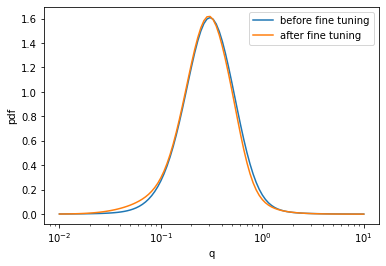

In [16]:
res_ft.summary_measure()
x = np.linspace(-2,1,100)
plt.plot(10**x, plain_res.pdf(x), label='before fine tuning')
plt.plot(10**x, res_ft.pdf(x), label='after fine tuning')
plt.xscale('log')
plt.xlabel('q')
plt.ylabel('pdf')
plt.legend()

In [38]:
import os
import re
folders = os.listdir('/home/aleruzza/.local/lib/python3.10/site-packages/DBNets/trained/realdata4')
mod = np.array([np.array(f.split('.')).astype(int) for f in folders if re.compile('\d.\d').match(f)])
max_model = np.max(mod[:,0])
max_fold = np.max([m[1] for m in mod if m[0]==max_model])

5